# ROAD INCIDENTS: A EXPLORATORY ANALYSIS OF ROAD FATALITIES IN THE US DURING THE YEAR 2020.

Welcome to team Road Incident's exploratory analysis into the road fatalities which have occoured accross all 50 States in the US during 2020. Many variables will be studied against road fatalities e.g. age, weather condition, hour, and speed limit to name a few, to find out what else will be explored, you will have to keep reading!

<b>The data used for this project's exploratory data analysis has been sourced from:<b>

National Highway Traffic Safety Administration, the data is available to the public through two forms:
- API (https://crashviewer.nhtsa.dot.gov/CrashAPI)
- All NHTSA records are also available to download in CSV form at (https://www.nhtsa.gov/file-downloadsp=nhtsa/downloads/FARS/2021/National/).

The data source contains US national records about road fatalities and numerous variables associated with each incident. 

## Data cleansing of the National Highway Traffic Safety Administration Data:

In [2]:
# Imports dependencies.
import pandas as pd
import hvplot.pandas
import numpy as np
import scipy as st
import scipy.stats as st
from scipy.stats import linregress 
import matplotlib.pyplot as plt
import time
import requests
import json
import csv 

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Imports CSV containing road accident data from the year 2020. 
csv_path = "source_data/Accidents_2020_2020.csv"
Accidents_2020 = pd.read_csv(csv_path)
Accidents_2020.head()

caseyear  state  st_case statename  ve_total  ve_forms  pvh_invl  peds  \
0      2020      1    10001   Alabama         1         1         0     0   
1      2020      1    10002   Alabama         4         4         0     0   
2      2020      1    10003   Alabama         2         2         0     0   
3      2020      1    10004   Alabama         1         1         0     0   
4      2020      1    10005   Alabama         1         1         0     0   

   pernotmvit  permvit  ...  cf2name  cf3 cf3name  fatals drunk_dr   age  \
0           0        4  ...      NaN  NaN     NaN       3        1  24.0   
1           0        6  ...      NaN  NaN     NaN       1        0  40.0   
2           0        2  ...      NaN  NaN     NaN       1        0  34.0   
3           0        5  ...      NaN  NaN     NaN       1        0  17.0   
4           0        1  ...      NaN  NaN     NaN       1        0  47.0   

   speed_limit                             race  vehicle_make     sex  
0         45.0        Black or African American         Lexus  Female  
1         35.0  Not a Fatality (not Applicable)     Chevrolet  Female  
2         65.0                            White        Toyota    Male  
3         35.0  Not a Fatality (not Applicable)       Hyundai    Male  
4         45.0                            White           GMC    Male  

[5 rows x 98 columns]

In [4]:
# The output DataFrame has lots of redundant columns, the below create a new DataFrames with the columns of focus.
Cleaned_df = Accidents_2020[["caseyear", "st_case","statename","persons", "countyname", "monthname", 
                                  "day_week", "hour", "rur_urbname", "routename", "latitude", "longitud", 
                                  "harm_evname","lgt_condname", "weathername", "fatals", "drunk_dr", "age", "speed_limit", "race", "vehicle_make", "sex"]]
Cleaned_df.head()

caseyear  st_case statename  persons      countyname monthname  day_week  \
0      2020    10001   Alabama        4     ELMORE (51)   January         4   
1      2020    10002   Alabama        6  JEFFERSON (73)   January         5   
2      2020    10003   Alabama        2    SHELBY (117)   January         5   
3      2020    10004   Alabama        5    CALHOUN (15)   January         6   
4      2020    10005   Alabama        1      COOSA (37)   January         7   

   hour rur_urbname                    routename  ...  \
0     2       Rural                  County Road  ...   
1    17       Urban  Local Street - Municipality  ...   
2    14       Rural                State Highway  ...   
3    15       Rural                  County Road  ...   
4     0       Rural                  County Road  ...   

                  harm_evname        lgt_condname weathername fatals drunk_dr  \
0        Tree (Standing Only)  Dark - Not Lighted       Clear      3        1   
1  Motor Vehicle In-Transport      Dark - Lighted        Rain      1        0   
2                       Ditch            Daylight        Rain      1        0   
3        Tree (Standing Only)            Daylight      Cloudy      1        0   
4        Tree (Standing Only)  Dark - Not Lighted        Rain      1        0   

    age  speed_limit                             race  vehicle_make     sex  
0  24.0         45.0        Black or African American         Lexus  Female  
1  40.0         35.0  Not a Fatality (not Applicable)     Chevrolet  Female  
2  34.0         65.0                            White        Toyota    Male  
3  17.0         35.0  Not a Fatality (not Applicable)       Hyundai    Male  
4  47.0         45.0                            White           GMC    Male  

[5 rows x 22 columns]

In [5]:
# Dropping NaN rows. 
Cleaned_df = Cleaned_df.dropna(how="any")
Cleaned_df.head()

caseyear  st_case statename  persons      countyname monthname  day_week  \
0      2020    10001   Alabama        4     ELMORE (51)   January         4   
1      2020    10002   Alabama        6  JEFFERSON (73)   January         5   
2      2020    10003   Alabama        2    SHELBY (117)   January         5   
3      2020    10004   Alabama        5    CALHOUN (15)   January         6   
4      2020    10005   Alabama        1      COOSA (37)   January         7   

   hour rur_urbname                    routename  ...  \
0     2       Rural                  County Road  ...   
1    17       Urban  Local Street - Municipality  ...   
2    14       Rural                State Highway  ...   
3    15       Rural                  County Road  ...   
4     0       Rural                  County Road  ...   

                  harm_evname        lgt_condname weathername fatals drunk_dr  \
0        Tree (Standing Only)  Dark - Not Lighted       Clear      3        1   
1  Motor Vehicle In-Transport      Dark - Lighted        Rain      1        0   
2                       Ditch            Daylight        Rain      1        0   
3        Tree (Standing Only)            Daylight      Cloudy      1        0   
4        Tree (Standing Only)  Dark - Not Lighted        Rain      1        0   

    age  speed_limit                             race  vehicle_make     sex  
0  24.0         45.0        Black or African American         Lexus  Female  
1  40.0         35.0  Not a Fatality (not Applicable)     Chevrolet  Female  
2  34.0         65.0                            White        Toyota    Male  
3  17.0         35.0  Not a Fatality (not Applicable)       Hyundai    Male  
4  47.0         45.0                            White           GMC    Male  

[5 rows x 22 columns]

In [6]:
# Checking the data types of the columns in the Cleaned_df. 
Cleaned_df.dtypes

caseyear          int64
st_case           int64
statename        object
persons           int64
countyname       object
monthname        object
day_week          int64
hour              int64
rur_urbname      object
routename        object
latitude        float64
longitud        float64
harm_evname      object
lgt_condname     object
weathername      object
fatals            int64
drunk_dr          int64
age             float64
speed_limit     float64
race             object
vehicle_make     object
sex              object
dtype: object

In [7]:
# Converting the age and speed limit columns from float to integer.
Cleaned_df = Cleaned_df.astype({"age":"int", 
                                 "speed_limit":"int"})
Cleaned_df.head()

caseyear  st_case statename  persons      countyname monthname  day_week  \
0      2020    10001   Alabama        4     ELMORE (51)   January         4   
1      2020    10002   Alabama        6  JEFFERSON (73)   January         5   
2      2020    10003   Alabama        2    SHELBY (117)   January         5   
3      2020    10004   Alabama        5    CALHOUN (15)   January         6   
4      2020    10005   Alabama        1      COOSA (37)   January         7   

   hour rur_urbname                    routename  ...  \
0     2       Rural                  County Road  ...   
1    17       Urban  Local Street - Municipality  ...   
2    14       Rural                State Highway  ...   
3    15       Rural                  County Road  ...   
4     0       Rural                  County Road  ...   

                  harm_evname        lgt_condname weathername fatals drunk_dr  \
0        Tree (Standing Only)  Dark - Not Lighted       Clear      3        1   
1  Motor Vehicle In-Transport      Dark - Lighted        Rain      1        0   
2                       Ditch            Daylight        Rain      1        0   
3        Tree (Standing Only)            Daylight      Cloudy      1        0   
4        Tree (Standing Only)  Dark - Not Lighted        Rain      1        0   

   age  speed_limit                             race  vehicle_make     sex  
0   24           45        Black or African American         Lexus  Female  
1   40           35  Not a Fatality (not Applicable)     Chevrolet  Female  
2   34           65                            White        Toyota    Male  
3   17           35  Not a Fatality (not Applicable)       Hyundai    Male  
4   47           45                            White           GMC    Male  

[5 rows x 22 columns]

In [8]:
# Renaming the columns in Cleaned_df to be self-explanatory.
Cleaned_df = Cleaned_df.rename(columns={"caseyear":"Year", "st_case": "Case_ID","statename":"State","persons": "Person_Count", 
                                                 "countyname":"County", "monthname": "Month", "day_week":"Day_Name", 
                                                 "hour":"Hour", "rur_urbname": "Rural_Urban", "routename":"Route_Name", 
                                                 "latitude": "Latitude", "longitud":"Longitude", "harm_evname": "Harm_Event",
                                                 "lgt_condname":"Visibility", "weathername":"Weather_Condition", "fatals":"Fatality_Count", "drunk_dr":"Drunk_Driver_Count"
                                                  , "age":"Age", "speed_limit":"Speed_Limit", "race":"Race", "vehicle_make": "Vehicle_Make", "sex":"Sex"})
Cleaned_df.head()

Year  Case_ID    State  Person_Count          County    Month  Day_Name  \
0  2020    10001  Alabama             4     ELMORE (51)  January         4   
1  2020    10002  Alabama             6  JEFFERSON (73)  January         5   
2  2020    10003  Alabama             2    SHELBY (117)  January         5   
3  2020    10004  Alabama             5    CALHOUN (15)  January         6   
4  2020    10005  Alabama             1      COOSA (37)  January         7   

   Hour Rural_Urban                   Route_Name  ...  \
0     2       Rural                  County Road  ...   
1    17       Urban  Local Street - Municipality  ...   
2    14       Rural                State Highway  ...   
3    15       Rural                  County Road  ...   
4     0       Rural                  County Road  ...   

                   Harm_Event          Visibility Weather_Condition  \
0        Tree (Standing Only)  Dark - Not Lighted             Clear   
1  Motor Vehicle In-Transport      Dark - Lighted              Rain   
2                       Ditch            Daylight              Rain   
3        Tree (Standing Only)            Daylight            Cloudy   
4        Tree (Standing Only)  Dark - Not Lighted              Rain   

  Fatality_Count Drunk_Driver_Count  Age  Speed_Limit  \
0              3                  1   24           45   
1              1                  0   40           35   
2              1                  0   34           65   
3              1                  0   17           35   
4              1                  0   47           45   

                              Race  Vehicle_Make     Sex  
0        Black or African American         Lexus  Female  
1  Not a Fatality (not Applicable)     Chevrolet  Female  
2                            White        Toyota    Male  
3  Not a Fatality (not Applicable)       Hyundai    Male  
4                            White           GMC    Male  

[5 rows x 22 columns]

In [9]:
# Cleaned_df summary description.
Cleaned_df.describe().applymap('{:,.0f}'.format)

Year  Case_ID Person_Count Day_Name    Hour Latitude Longitude  \
count  34,958   34,958       34,958   34,958  34,958   34,958    34,958   
mean    2,020  271,691            2        4      14       37       -88   
std         0  163,768            2        2      10        6        69   
min     2,020   10,001            0        1       0       19      -165   
25%     2,020  121,933            1        2       7       33       -98   
50%     2,020  260,896            2        4      15       36       -88   
75%     2,020  420,460            3        6      19       40       -82   
max     2,020  560,104           61        7      99      100     1,000   

      Fatality_Count Drunk_Driver_Count     Age Speed_Limit  
count         34,958             34,958  34,958      34,958  
mean               1                  0      51          50  
std                0                  0      88          17  
min                1                  0       0           0  
25%                1                  0      27          40  
50%                1                  0      40          50  
75%                1                  1      58          55  
max                8                  3     999          99

In [10]:
# Cleaned_df info.
Cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34958 entries, 0 to 36152
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                34958 non-null  int64  
 1   Case_ID             34958 non-null  int64  
 2   State               34958 non-null  object 
 3   Person_Count        34958 non-null  int64  
 4   County              34958 non-null  object 
 5   Month               34958 non-null  object 
 6   Day_Name            34958 non-null  int64  
 7   Hour                34958 non-null  int64  
 8   Rural_Urban         34958 non-null  object 
 9   Route_Name          34958 non-null  object 
 10  Latitude            34958 non-null  float64
 11  Longitude           34958 non-null  float64
 12  Harm_Event          34958 non-null  object 
 13  Visibility          34958 non-null  object 
 14  Weather_Condition   34958 non-null  object 
 15  Fatality_Count      34958 non-null  int64  
 16  Drun

## API Consideration

The dataset cleaned above is also available through an API retrieval. 

However, this study's focus is on all states accross the US which means the returned API response is excessivley large for all the variables being considered. Therefore, it was more sensible to download the data into a CSV rather than having to communicate with the API and then format it into a DataFrame. 

However, the variables available in the API have been included below to view all which were available to us for this study:

In [11]:
# Retrieves the JSON file containing the variables from the data source. 
url = "https://crashviewer.nhtsa.dot.gov/CrashAPI"
query = "/definitions/GetVariables?dataYear=2010&format=json"

response = requests.get(url + query)
response = response.json()

print(json.dumps(response, indent=4, sort_keys=True))

{
    "Count": 341,
    "Message": "Results returned successfully",
    "Results": [
        [
            {
                "DATATYPE": "smallint",
                "VARIABLENAME": "STATE"
            },
            {
                "DATATYPE": "int",
                "VARIABLENAME": "ST_CASE"
            },
            {
                "DATATYPE": "int",
                "VARIABLENAME": "EVENTNUM"
            },
            {
                "DATATYPE": "int",
                "VARIABLENAME": "VE_FORMS"
            },
            {
                "DATATYPE": "smallint",
                "VARIABLENAME": "VE_TOTAL"
            },
            {
                "DATATYPE": "smallint",
                "VARIABLENAME": "VEH_NO"
            },
            {
                "DATATYPE": "int",
                "VARIABLENAME": "DRIMPAIR"
            },
            {
                "DATATYPE": "int",
                "VARIABLENAME": "MDRDSTRD"
            },
            {
                "DATATYPE"

In [12]:
# Printing the variables available using the API in a more readable format. 
for variable in response["Results"][0]:
    print(f'Variable name: {variable["VARIABLENAME"]}')
    print('---------------------------') 

Variable name: STATE
---------------------------
Variable name: ST_CASE
---------------------------
Variable name: EVENTNUM
---------------------------
Variable name: VE_FORMS
---------------------------
Variable name: VE_TOTAL
---------------------------
Variable name: VEH_NO
---------------------------
Variable name: DRIMPAIR
---------------------------
Variable name: MDRDSTRD
---------------------------
Variable name: MDRMANAV
---------------------------
Variable name: MFACTOR
---------------------------
Variable name: MVIOLATN
---------------------------
Variable name: MVISOBSC
---------------------------
Variable name: PER_NO
---------------------------
Variable name: PVE_FORMS
---------------------------
Variable name: VE_FORMS
---------------------------
Variable name: VEH_NO
---------------------------
Variable name: VEVENTNUM
---------------------------
Variable name: VNUMBER1
---------------------------
Variable name: AOI1
---------------------------
Variable name: MPR_ACT
--

*For further exploration of the above variables, you may wish to refer to the below. 
FARS Analytical Users Manual: https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/813417*

<b>Now that the data cleanse has concluded, this study will explore the following topic areas:<b>

1) A map distribution of road accidents.    
    
2) State Vs. Fatality Count.
    
3) Age Vs. Accident Count.
    
4) Weather Condition Vs. Fatality Count.
    
5) Route Type Vs. Fatality Count.
    
6) Visability Vs. Fatality Count.
    
7) Time of Day (Hour) Vs. Fatality Count.
    
8) Speed Limit Vs. Fatality Count.
    
9) Further Insights.

# 1) Map of Accidents

Please zoom in to the USA to view.

In [13]:
# creating map visualisation of all accidents.
accident_map = Cleaned_df.hvplot.points("Longitude", "Latitude", geo=True, xlabel="Longitude", ylabel="Latitude",
                                     tiles="OSM", title="Map of Accidents", color="red", alpha=0.1,
                                    hover_cols = ["State", "County"])
accident_map

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (State,County)

The map visualisation shows a higher concentration of datapoints in the Eastern half of the US as well as along the West Coast. After further research we determined that this aligned with the population density and National Highway Network of the US. It made sense that where population is higher and there are more extensive road networks, a larger number of accidents occur.

# 2) State Vs. Road Fatalities

In [14]:
#calculating the sum of 'Fatality_Count' at each 'Hour'
state_counts = Cleaned_df.groupby('State')['Fatality_Count'].sum()
state_counts

State
Alabama                  923
Alaska                    64
Arizona                 1027
Arkansas                 643
California              3939
Colorado                 620
Connecticut              279
Delaware                 116
District of Columbia      36
Florida                 3159
Georgia                 1586
Hawaii                    84
Idaho                    208
Illinois                1132
Indiana                  880
Iowa                     338
Kansas                   407
Kentucky                 770
Louisiana                814
Maine                    143
Maryland                 531
Massachusetts            337
Michigan                1074
Minnesota                377
Mississippi              736
Missouri                 965
Montana                  210
Nebraska                 204
Nevada                   322
New Hampshire            104
New Jersey               577
New Mexico               397
New York                1009
North Carolina          1518
North Da

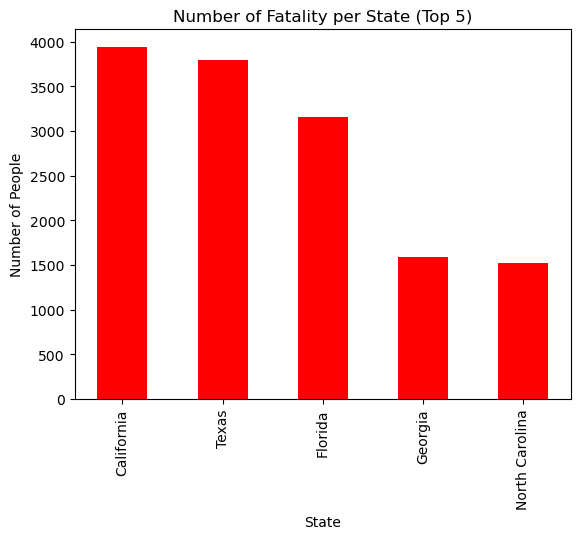

In [15]:
#Get the top 5 highest values
top5_state_counts = state_counts.nlargest(5)

#Define the width of the bars
bar_width = 0.5  # Adjust the value to make the bars thinner or wider


# Plotting bar chart. 
plt.bar(top5_state_counts.index, top5_state_counts.values, width=bar_width, color = 'red')


plt.title('Number of Fatality per State (Top 5)')
plt.xlabel('State')
plt.ylabel('Number of People')

plt.xticks(rotation='vertical')

plt.savefig("output_data/state_bar.png")
plt.show()

California has the highest the highest number of fatalities. Followed by Texas. 

# 3) How does Driver Age relate to Number of Accidents?

There is a common assertion that younger drivers tend to cause more road accidents. We were hoping to prove this empirically by comparing the number of road accidents by the age of the driver and identifying any trends.

For an initial exploration, a histogram was produced to determine the distribution of ages of drivers in our accident database.

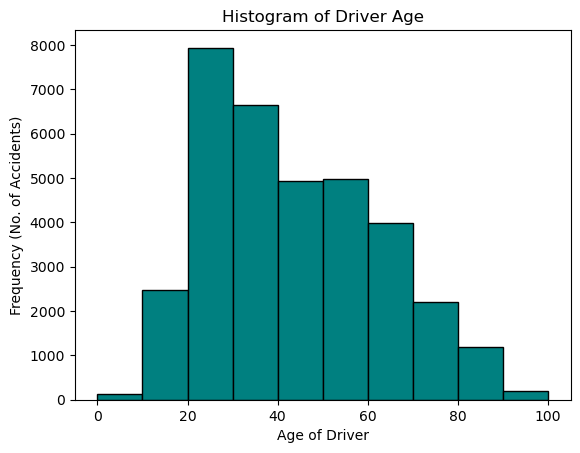

In [16]:
# excluding outlier age values which may skew data
ages_df = Cleaned_df[Cleaned_df["Age"] <= 200]

# plotting histogram of age
plt.hist(ages_df["Age"], bins=10, color="teal", edgecolor="black")
plt.xlabel("Age of Driver")
plt.ylabel("Frequency (No. of Accidents)")
plt.title("Histogram of Driver Age")
plt.savefig("output_data/age_hist.png")
plt.show()

The results show that the data is right-skewed, meaning there is a higher frequency of datapoints at the lower end of the age scale i.e. more accidents where the driver was younger.

In [17]:
# calculating the mean, mode and median
mean_age = round(ages_df['Age'].mean())
mode_age = round(ages_df['Age'].mode().values[0])
median_age = round(ages_df['Age'].median())

print("The Mean Age of drivers in accidents is", mean_age)
print("The Mode Age of drivers in accidents is", mode_age)
print("The Median Age of drivers in accidents is", median_age)

The Mean Age of drivers in accidents is 43
The Mode Age of drivers in accidents is 28
The Median Age of drivers in accidents is 40


Since our data is right-skewed, the mode and median would be more representative of the average driver than the mean as they are less susceptible to outlier values. Here, the summary statistics support the assertion that road accidents are more often caused by younger drivers.

We then performed a linear regression to explore the relationship between driver age and number of accidents and calculated the Pearson correlation coefficient for this relationship.

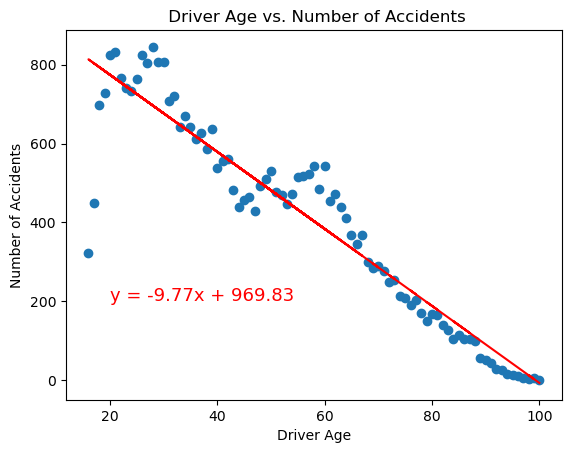

The correlation coefficient between age and the number of accidents is -0.94


In [18]:
# defining minimum age limit
ages_df = ages_df[ages_df["Age"] >= 16]
# selecting all age values
age_counts = ages_df["Age"].value_counts()

# extracting the list of ages and their corresponding counts
ages = age_counts.index
accident_counts = age_counts.values

# creating scatter plot and calculating linear regression
x_values = ages
y_values = accident_counts
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Driver Age")
plt.ylabel("Number of Accidents")
plt.title(" Driver Age vs. Number of Accidents")
plt.annotate(line_eq,(20,200),fontsize=13,color="red")
plt.savefig("output_data/age_scatter.png")
plt.show()

# printing correlation coefficient
print(f"The correlation coefficient between age and the number of accidents is {round(st.pearsonr(ages, accident_counts)[0],2)}")


The regression showed a strong negative correlation between driver age and the number of accidents, supported by the Pearson correlation coefficient value of r = -0.94. This does support the assertion that younger drivers cause the highest number of accidents.

However, it is important to note that the number of accidents per age group is influenced by the number of drivers for each age group. For example, though a relatively small number of accidents are caused by drivers over the age of 80, this may be due to the fact that there are likely very few drivers on the road that are over the age of 80. We can also see this for the 16 and 17 year old age groups. As 16 and 17 year olds are younger than 18+ year olds, we would expect them to involved in a greater number of accidents than 18+ year olds, however the opposite is the case in this analysis. We determined that this is due to there being a smaller number of drivers aged 16 and 17 than drivers over the age of 18 as the minimum driving age varies by state and not all states allow under 18s to drive.

# Linear Regression - API Method

Though we imported our data from a .csv file for our analysis, an alternative method using an API was considered. Using the NHTSA's GetCrashesByPerson API, we were able to loop through a defined age range, amending the url's age filter with each age in the range and then appending the number of results in each response to a list of accidents, as seen below.

In [19]:
# defining age limits
ages_api = [age for age in range(16, 100)]
# creating empty list for accidents
accidents_api = []

In [20]:
# looping through ages and performing API request for each age in list
for age in ages_api:
    url = f"https://crashviewer.nhtsa.dot.gov/CrashAPI//crashes/GetCrashesByPerson?age={age}&sex=1&seatPos=11&injurySeverity=4&fromCaseYear=2020&toCaseYear=2020&state=6%20&includeOccupants=true&includeNonOccupants=true&format=json"
    response = requests.get(url).json()
    # counting number of accidents
    result_count = len(response['Results'][0])
    # appending accidents to empty list
    accidents_api.append(result_count)

In [21]:
# creating DataFrame for age and accident count
ages_api_df = pd.DataFrame({"Age":ages_api, 
                       "Accident_Count": accidents_api})
ages_api_df.head()

Age  Accident_Count
0   16               7
1   17              13
2   18              27
3   19              37
4   20              57

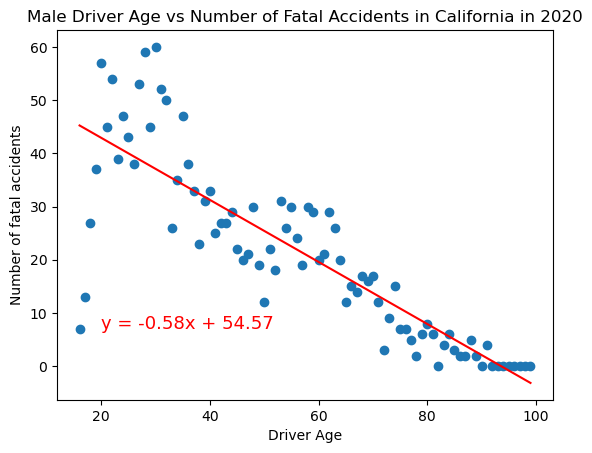

The correlation coefficient between age and the number of accidents is -0.85


In [22]:
# creating scatter plot of age and accident count and computing linear regression
x_values = ages_api_df["Age"]
y_values = ages_api_df["Accident_Count"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Driver Age")
plt.ylabel("Number of fatal accidents")
plt.title("Male Driver Age vs Number of Fatal Accidents in California in 2020")
plt.annotate(line_eq,(20,7),fontsize=13,color="red")
plt.savefig("output_data/age_scatter.png")
plt.show()

# printing correlation coefficient
print(f"The correlation coefficient between age and the number of accidents is {round(st.pearsonr(x_values, y_values)[0],2)}")

Unfortunately, we were not able to perform an API request on the full accident dataset for the year 2020. Instead, a prerequisite of using this API was that a filter must be added to every filter category provided in the url for a response to be provided. This resulted in a significantly reduced dataset - the example above represents accident data for male drivers in the state of California where the accident resulted in at least one death. Though the regression showed a similar correlation to age as determined in the previous analysis, the reduced size of the dataset meant that multiple API requests and merges would have to be performed to achieve representative data which would be more complicated and time-consuming. For this reason, we opted to use utilise the full dataset available via csv import instead.

For the final part of the analysis for this question, the ages were grouped and summary percentages were calculated for each age group, as seen below:

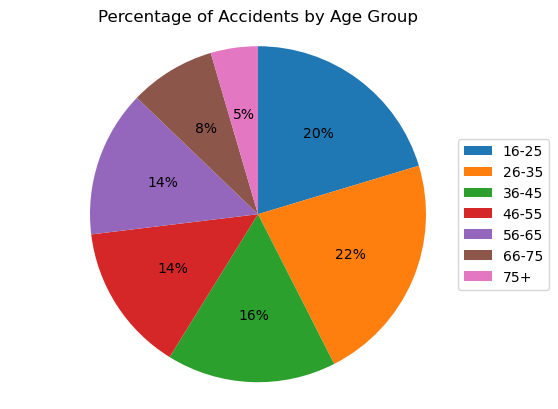

In [23]:
# defining bins and labels for each age group
bins = [16, 25, 35, 45, 55, 65, 75, 85]
labels = ["16-25", "26-35", "36-45", "46-55", "56-65", "66-75", "75+"]

# grouping ages and retreiving number of values for each age group
age_groups = pd.cut(ages_df["Age"], bins=bins, labels=labels, include_lowest=True)
age_group_counts = age_groups.value_counts().sort_index()

# creating pie chart of accidents by age group
plt.pie(age_group_counts, labels=None, autopct= "%1.0f%%", counterclock = False, 
        startangle = 90)
plt.title("Percentage of Accidents by Age Group")
plt.axis("equal")

# adding the legend at the side
plt.legend(age_group_counts.index, loc="center right", bbox_to_anchor=(1.1, 0.5))
plt.savefig("output_data/age_pie.png")
plt.show()

We were able to show that younger drivers cause the greatest number of accidents, with drivers aged 16-35 contributing to almost half of all road accidents. The most common age among drivers involved in road accidents was 28 and the 26-35 year old age group contributed to the greatest percantage of accidents.

We can conclude that further research is necessary to determine whether the number of accidents per age group is representative of the population of drivers for each age group, and which factors may influence the rate of road accidents for different age groups.

The following recommendations could also be made from the results of our analysis:

Increased education including targeted interventions may be necessary for younger drivers or newer drivers.
Stricter driving examinations could be enforced for individuals seeking to get their driving license.
A consistent, nation-wide minimum driving age limit may be benefical to reduce the number of younger drivers on the road

# 4)  Weather Conditions Vs. Fatalities

The following analysis will use the weather conditions and fatality data provided by the csv file sourced from the National Highway Traffic Safety Administration.

It will include a summary statistics table, distribution of fatal accidents by weather conditions, mean fatal accidents by weather conditions and fatal accidents by weather condition and visibility.

The conclusion drawn from this analysis was that most accidents occured during clear weather conditions, during daylight. This is due to the fact that most people commute during these times using transport for their daily obligations.

In [24]:
# Grouping cleaned data by weather conditions and summary statistics. 
weather_stats = Cleaned_df.groupby('Weather_Condition')['Fatality_Count'].agg(['mean', 'median', 'std'])

weather_stats

mean  median       std
Weather_Condition                                   
Blowing Sand, Soil, Dirt  1.000000     1.0  0.000000
Blowing Snow              1.000000     1.0  0.000000
Clear                     1.084017     1.0  0.339494
Cloudy                    1.093472     1.0  0.348738
Fog, Smog, Smoke          1.114525     1.0  0.491680
Freezing Rain or Drizzle  1.083333     1.0  0.280306
Not Reported              1.074677     1.0  0.337941
Other                     1.100000     1.0  0.307794
Rain                      1.093629     1.0  0.357277
Reported as Unknown       1.058201     1.0  0.312504
Severe Crosswinds         1.156863     1.0  0.504878
Sleet or Hail             1.074074     1.0  0.384900
Snow                      1.112727     1.0  0.359975

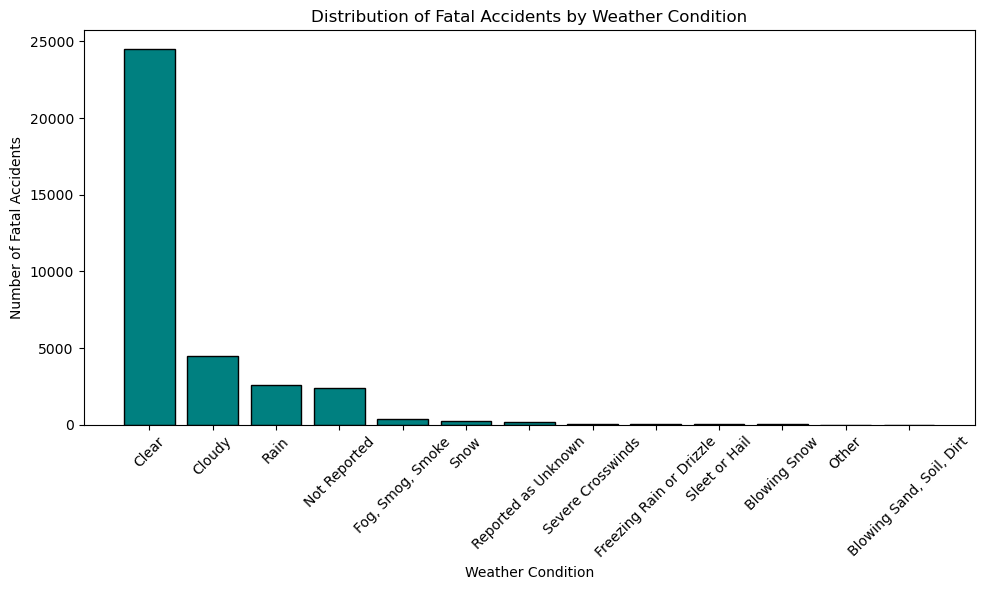

In [25]:
# Removing accidents with no fatalities
fatal_accidents = Cleaned_df[Cleaned_df['Fatality_Count'] > 0]

# Amount of fatal accidents by weather condition
weather_counts = fatal_accidents['Weather_Condition'].value_counts()

# Plotting bar chart
plt.figure(figsize=(10, 6))
plt.bar(weather_counts.index, weather_counts.values, color='teal', edgecolor='black')

plt.xlabel('Weather Condition')
plt.ylabel('Number of Fatal Accidents')
plt.title('Distribution of Fatal Accidents by Weather Condition')

plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig("output_data/weather_condition_barchart.png")
plt.show()

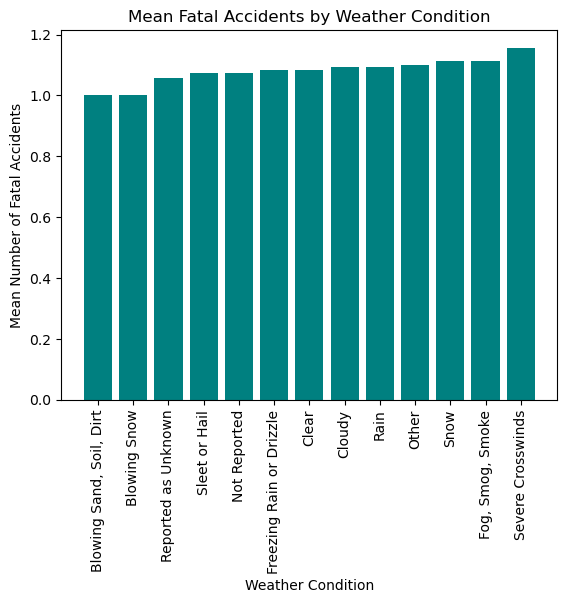

In [26]:
# calculating mean number of fatal accidents by weather condition
mean_fatalities = Cleaned_df.groupby('Weather_Condition')['Fatality_Count'].mean().sort_values()

# plotting bar chart
plt.bar(mean_fatalities.index, mean_fatalities, color='teal')
plt.xlabel('Weather Condition')
plt.ylabel('Mean Number of Fatal Accidents')
plt.title('Mean Fatal Accidents by Weather Condition')
plt.xticks(rotation=90)

plt.savefig("output_data/weather_mean_barchart.png")
plt.show()

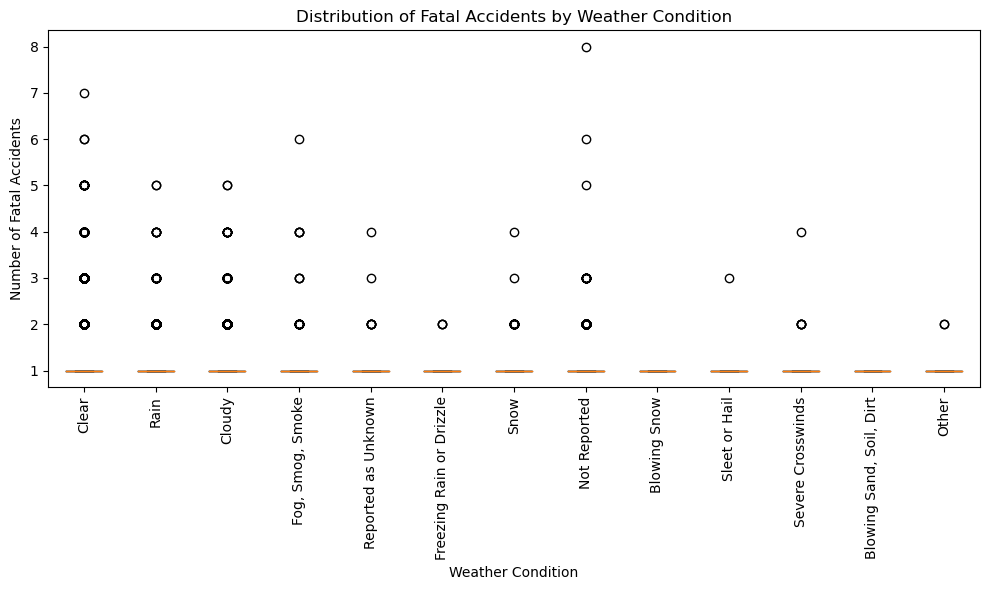

In [27]:
# Creating dataset for amount fatal accident by weather condition
data = [fatal_accidents[fatal_accidents['Weather_Condition'] == condition]['Fatality_Count'].values
        for condition in fatal_accidents['Weather_Condition'].unique()]


weather_conditions = fatal_accidents['Weather_Condition'].unique()

# Plotting the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data)
plt.xlabel('Weather Condition')
plt.ylabel('Number of Fatal Accidents')
plt.title('Distribution of Fatal Accidents by Weather Condition')
plt.xticks(range(1, len(weather_conditions) + 1), weather_conditions, rotation=90)
plt.tight_layout()

plt.savefig("output_data/weather_fatal_boxlot.png")
plt.show()

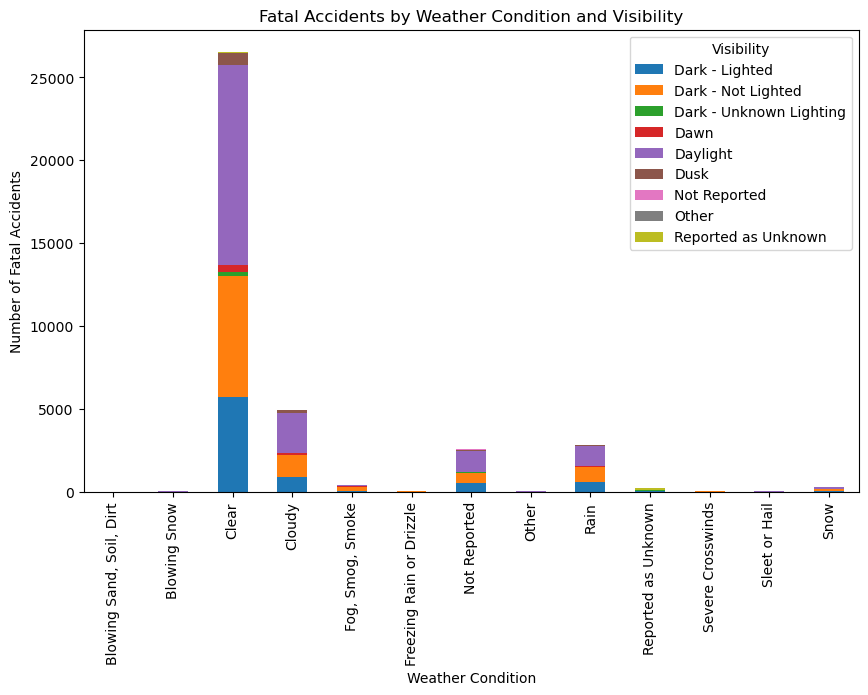

In [28]:
# Grouping fatality counts by weather condition and visibility
weather_visibility = Cleaned_df.groupby(['Weather_Condition', 'Visibility'])['Fatality_Count'].sum().unstack()

# Plotting a stacked bar chart
weather_visibility.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Weather Condition')
plt.ylabel('Number of Fatal Accidents')
plt.title('Fatal Accidents by Weather Condition and Visibility')
plt.xticks(rotation=90)
plt.legend(title='Visibility')

plt.savefig("output_data/weather_visability_stackedbar.png")
plt.show()

# 5) Route Names Vs. Fatalities

The following analysis will use the weather conditions and fatality data provided by the cvs file sourced from the National Highway Traffic Safety Administration.

It will include a summary statistics table, distribution of fatal accidents by route names, mean fatal accidents by route name and fatal accidents by route name and weather condition.

The main conclusion drawn from this analysis is that most fatal accidents occured on the State HighWay during clear weather conditions (which supports analysis above). This is due to an icreased volume of vehicles using these roads, and vehicles merging from intersections at different speed limits.

Better road signage and safety measures can help reduce accidents happening on Sate Highways.

In [29]:
# Grouping data by route name and calculating mean, median and standard deviation
route_stats = Cleaned_df.groupby('Route_Name')['Fatality_Count'].agg(['mean', 'median', 'std'])

route_stats

mean  median       std
Route_Name                                              
County Road                   1.064879     1.0  0.291580
Interstate                    1.110726     1.0  0.398251
Local Street - Frontage Road  1.059574     1.0  0.254582
Local Street - Municipality   1.061209     1.0  0.278137
Local Street - Township       1.054604     1.0  0.266402
Other                         1.064848     1.0  0.293974
State Highway                 1.094122     1.0  0.353435
U.S. Highway                  1.112158     1.0  0.411010
Unknown                       1.062410     1.0  0.295570

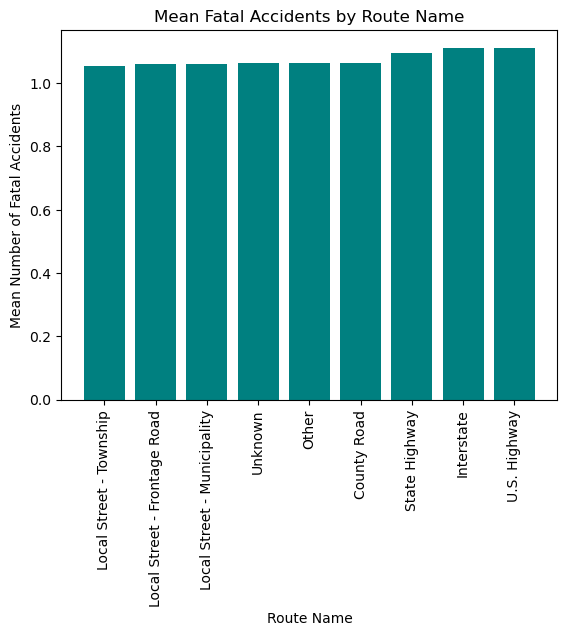

In [30]:
# Calculating the mean number of fatal accidents by route name
mean_fatalities = Cleaned_df.groupby('Route_Name')['Fatality_Count'].mean().sort_values()

# Plotting bar chart
plt.bar(mean_fatalities.index, mean_fatalities, color='teal')
plt.xlabel('Route Name')
plt.ylabel('Mean Number of Fatal Accidents')
plt.title('Mean Fatal Accidents by Route Name')
plt.xticks(rotation=90)

plt.savefig("output_data/mean_fatality_barchart.png")
plt.show()

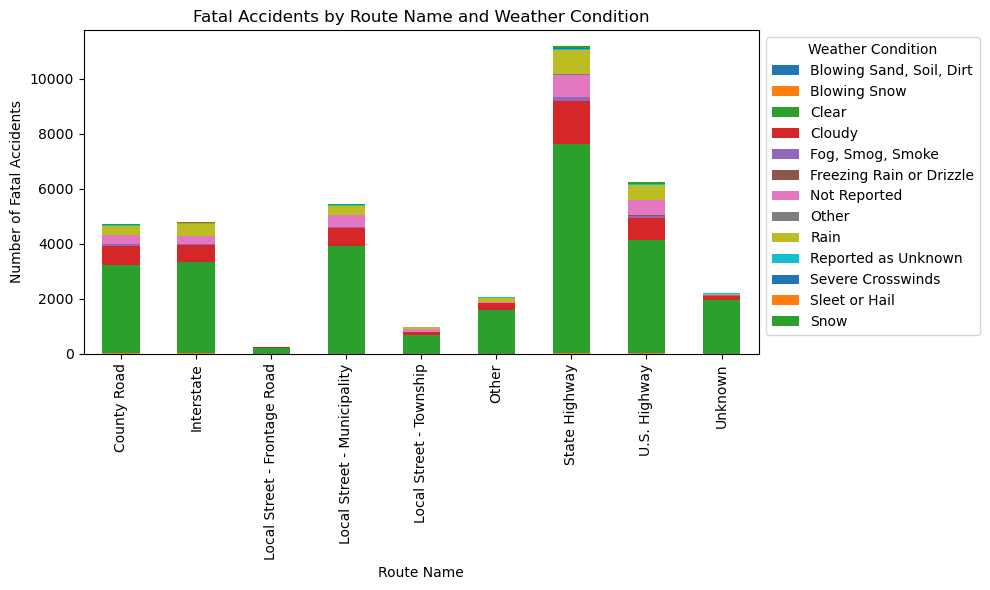

In [31]:
# Grouping data by route name and weather condition 
route_weather = Cleaned_df.groupby(['Route_Name', 'Weather_Condition'])['Fatality_Count'].sum().unstack()

# Plotting a stacked bar chart
route_weather.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Route Name')
plt.ylabel('Number of Fatal Accidents')
plt.title('Fatal Accidents by Route Name and Weather Condition')
plt.xticks(rotation=90)

plt.legend(title='Weather Condition', bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()

plt.savefig("output_data/route_weather_stackedbarchart.png")
plt.show()

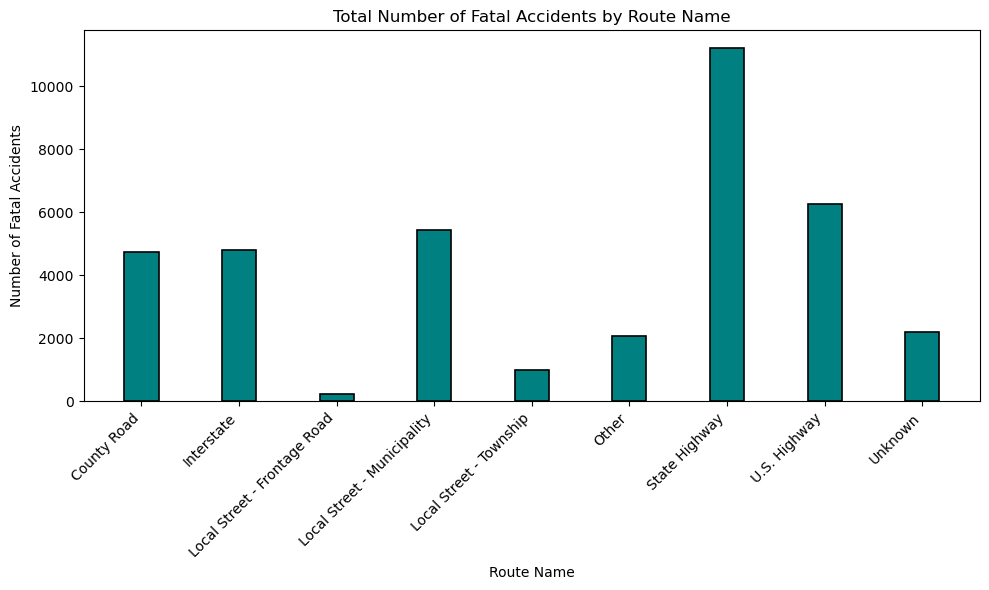

In [81]:
# Distribution of fatal accidents by route names
plt.figure(figsize=(10, 6))
route_names = route_weather.index
bar_width = 0.35

# Create an array of indices for x-axis positioning
x = np.arange(len(route_names))

# total number of fatalities for each route name
fatalities = route_weather.sum(axis=1)

# Plot bar chart bars 
plt.bar(x, fatalities, bar_width, color='teal', edgecolor='black', linewidth=1.2)

plt.xlabel('Route Name')
plt.ylabel('Number of Fatal Accidents')
plt.title('Total Number of Fatal Accidents by Route Name')


plt.xticks(x, route_names, rotation=45, ha='right')

plt.tight_layout()

plt.savefig("output_data/fatal_accidents_route_name_bar_chart.png")
plt.show()



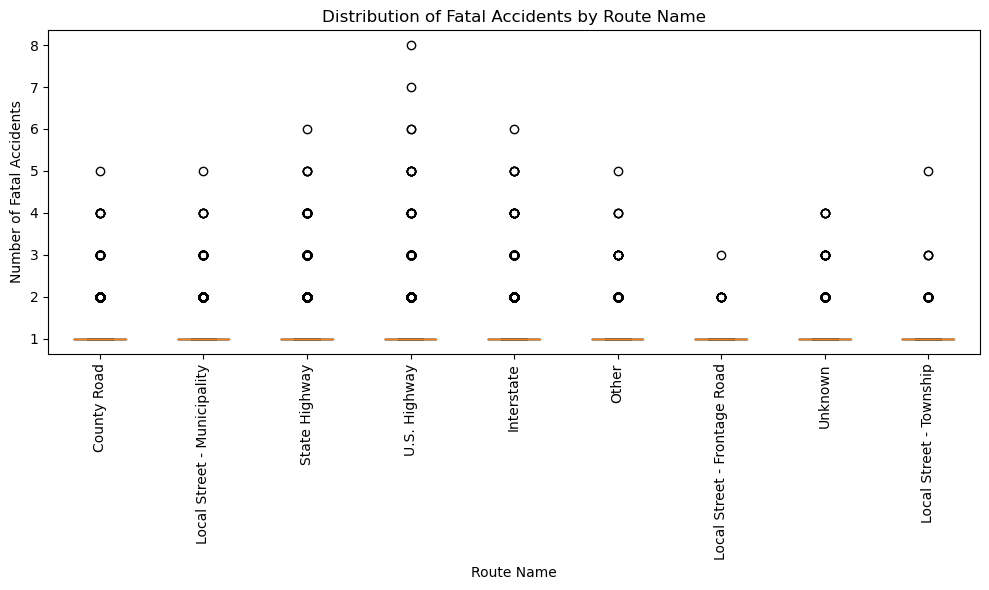

In [82]:
plt.figure(figsize=(10, 6))

# Extract unique route names
route_names = fatal_accidents['Route_Name'].unique()

# Plot box plot for each route
plt.boxplot([fatal_accidents[fatal_accidents['Route_Name'] == route]['Fatality_Count'] for route in route_names])

plt.xlabel('Route Name')
plt.ylabel('Number of Fatal Accidents')
plt.title('Distribution of Fatal Accidents by Route Name')

# Set the x-axis ticks to display route names
plt.xticks(range(1, len(route_names) + 1), route_names, rotation=90)

plt.tight_layout()

plt.savefig("output_data/fatal_acc_by_route_boxplot.png")
plt.show()


# 6) Visibility vs Fatality Count

Visability in the this study takes on the meaning of the range of vision/ clarity at the time the road incident took place.

In [34]:
# Creating a separate DataFrame to visualise the various visibilities and the number of fatalities which occured in each case.
visibility_df = Cleaned_df[["Visibility", "Fatality_Count"]]
visibility_df.reset_index()
visibility_df.head()

Visibility  Fatality_Count
0  Dark - Not Lighted               3
1      Dark - Lighted               1
2            Daylight               1
3            Daylight               1
4  Dark - Not Lighted               1

In [35]:
# There are many types of visibility categories, this study will focus on the three with the highest frequency.
visibility_df["Visibility"].value_counts()

Daylight                   15920
Dark - Not Lighted          9619
Dark - Lighted              7303
Dusk                         934
Dawn                         630
Dark - Unknown Lighting      317
Reported as Unknown          152
Not Reported                  66
Other                         17
Name: Visibility, dtype: int64

In [36]:
# Narrowing down the DataFrame to only include records relating to the three visibility types of focus. 
visibility_df = visibility_df.loc[(visibility_df["Visibility"]=="Daylight") | 
                                  (visibility_df["Visibility"]=="Dark - Not Lighted") |
                                  (visibility_df["Visibility"]=="Dark - Lighted") 
                                  , :]

visibility_df["Visibility"].unique()

array(['Dark - Not Lighted', 'Dark - Lighted', 'Daylight'], dtype=object)

In [37]:
# Groups the visibility_df by the visibility type.
visibility_df = visibility_df.groupby(["Visibility"]).sum()
visibility_df = visibility_df.reset_index()
visibility_df

Visibility  Fatality_Count
0      Dark - Lighted            7860
1  Dark - Not Lighted           10504
2            Daylight           17311

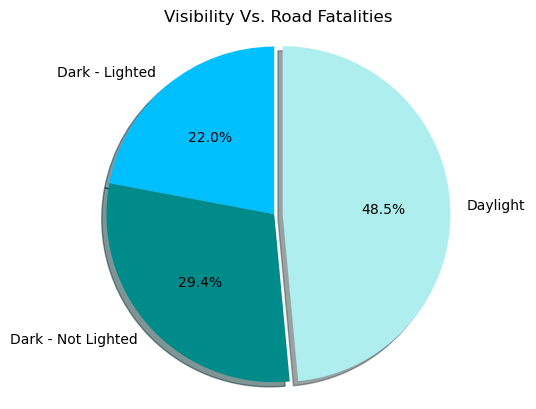

In [38]:
# Pie Plot.
colors = ["deepskyblue", "darkcyan", "paleturquoise"]
explode = (0, 0.00, 0.05)

plt.title("Visibility Vs. Road Fatalities")
plt.pie(visibility_df["Fatality_Count"], explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90, labels =visibility_df["Visibility"])
plt.axis("equal")
plt.savefig("output_data/visibility_pie.png")
plt.show()

<b> Visibility Vs. Fatality Analysis: <b>
    
Out of three most frequently recorded types of visibilities: Daylight, Dark - Lighted, and Dark - Not Lighted. It is apparent that the most road fatalities have occoured within daylight. This makes sense as during daylight hours is when the majority of the population are using motor transport to commute to work, run school pickups, and other daily errands. During these daily obligations it is likely that people are not 100% focused on their driving and therefore more fatalities are recorded. 
    
It can also be seen that when just comparing the visibility in the dark, if the road if not lighted there is a higher chance of a fatality. Action which can be taken from this is to ensure that any roads which can be lit, are to help prevent unecessary fatalities. 

To provide a wider perspective of visibilities, please see below:

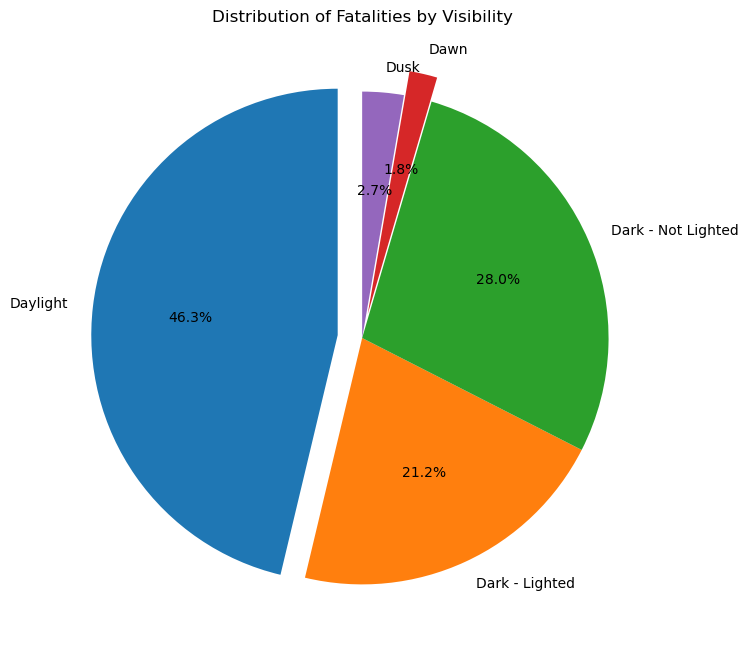

In [83]:
# Create data for visibility and fatality
visibility_labels = ['Daylight', 'Dark - Lighted', 'Dark - Not Lighted', 'Dawn', 'Dusk']
fatality_counts = [15920, 7303, 9619, 630, 934]

# Calculate the total number of fatalities
total_fatalities = sum(fatality_counts)

# Calculate the percentage of each slice
percentages = [count / total_fatalities * 100 for count in fatality_counts]

# Set the explode values for each slice
explode = [0.1, 0, 0, .1, 0]

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(fatality_counts, labels=visibility_labels, autopct='%1.1f%%', startangle=90, explode=explode)

plt.title('Distribution of Fatalities by Visibility')

plt.savefig("output_data/fatalities_by_visibility_piechart.png")
plt.show()



# 7 ) Hour Vs. Fatality

In [54]:
#calculating the sum of 'Fatality_Count' at each 'Hour'
hourly_counts = Cleaned_df.groupby('Hour')['Fatality_Count'].sum()
hourly_counts

Hour
0     1580
1     1329
2     1278
3     1015
4     1005
5     1077
6     1323
7     1121
8      909
9      955
10    1101
11    1269
12    1433
13    1574
14    1692
15    1909
16    1946
17    2090
18    2312
19    2258
20    2298
21    2313
22    2017
23    1836
99     315
Name: Fatality_Count, dtype: int64

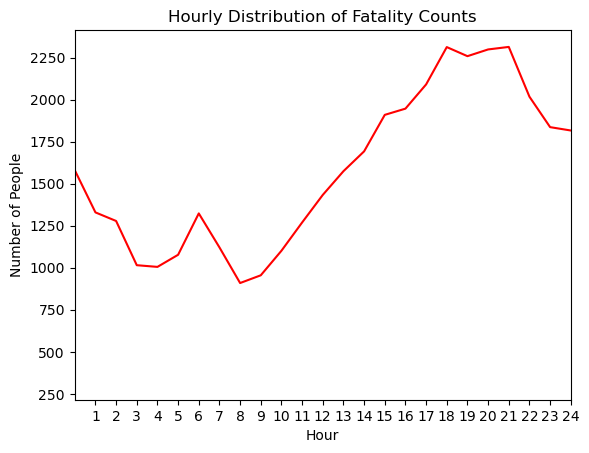

In [55]:
# Create a line plot
plt.plot(hourly_counts.index, hourly_counts.values, color = 'red')

# Set the plot title and labels
plt.title('Hourly Distribution of Fatality Counts')
plt.xlabel('Hour')
plt.ylabel('Number of People')
plt.xlim([0,24])

# Set the x-axis ticks
plt.xticks(range(1, 25))


# Display the plot
plt.savefig("output_data/hour_fatality_line.png")
plt.show()

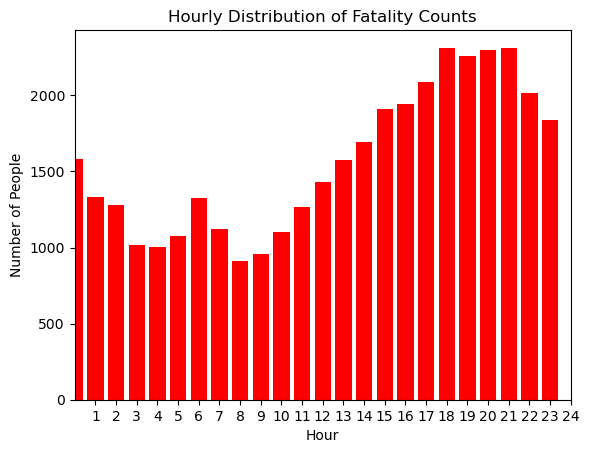

In [56]:
# Create a bar plot
plt.bar(hourly_counts.index, hourly_counts.values, color = 'red')

# Set the plot title and labels
plt.title('Hourly Distribution of Fatality Counts')
plt.xlabel('Hour')
plt.ylabel('Number of People')
plt.xlim([0,24])

# Set the x-axis ticks
plt.xticks(range(1, 25))


# Display the plot
plt.savefig("output_data/hour_fatality_bar.png")
plt.show()

# 8) Speed limit vs Fatality Count

Speed limit in the this study takes on the meaning of the maximum speed limit of the road where the road incident took place. 

The fatalities which occoured on roads of varying speed limits will be analysed. 

In [57]:
# Creating a separate DataFrame to visualise the the number of fatalities which occoured at each of the speed limits included 
# in this road incident dataset. 
speed_limit_df = Cleaned_df[["Speed_Limit", "Fatality_Count"]]
speed_limit_df.reset_index()
speed_limit_df

Speed_Limit  Fatality_Count
0               45               3
1               35               1
2               65               1
3               35               1
4               45               1
...            ...             ...
36148           70               2
36149           75               1
36150           40               1
36151           70               1
36152           55               1

[34958 rows x 2 columns]

<b> Before fatality counts are observed against speed limits,  some exploration of the speed limits at each road incident will be inspected:<b> 

In [58]:
# Calculating measures of central tendancy for the speed limits in this dataset.

mean_numpy = round(np.mean(speed_limit_df["Speed_Limit"]),2)
print(f"\n The mean speed limit that road accidents occured on was {mean_numpy} MPH")

sd_numpy = round(np.std(speed_limit_df["Speed_Limit"], ddof=0), 2)
print(f"\n The population standard deviation is {sd_numpy} MPH, this is how much the speed limits of the group vary from the population's mean \n speed limit)")

median_numpy = round(np.median(speed_limit_df["Speed_Limit"]),2)
print(f"\n The median speed limit that road accidents occured on was {median_numpy} MPH")

mode_scipy = st.mode(speed_limit_df["Speed_Limit"], keepdims=False)
print(f"\n The modal speed limit of road accidents occured on roads with a speed limit of {mode_scipy[0]} MPH")


 The mean speed limit that road accidents occured on was 50.23 MPH

 The population standard deviation is 17.04 MPH, this is how much the speed limits of the group vary from the population's mean 
 speed limit)

 The median speed limit that road accidents occured on was 50.0 MPH

 The modal speed limit of road accidents occured on roads with a speed limit of 55 MPH


As a initial perspective, it may be inferred that road accidents are most likely to occur at approx 50 MPH. Both the mean and median are good representations of this which suggest that the speed limit data is normally distributed. However, this can now be further explored:

NormaltestResult(statistic=0.10941211174051935, pvalue=0.9467634026002677)
NormaltestResult(statistic=11.363042524674213, pvalue=0.0034083694733930067)


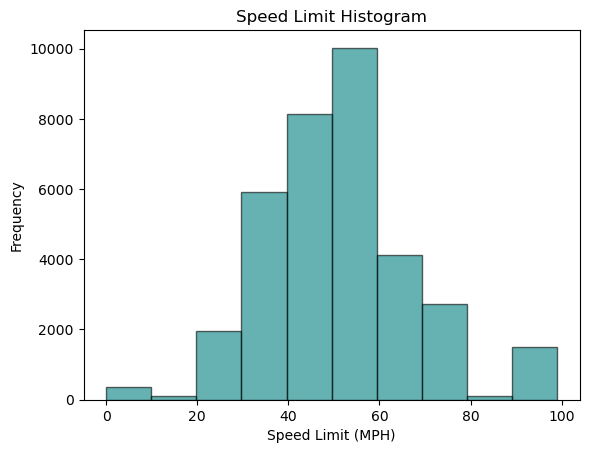

In [59]:
# Characterises the speed limit data using a histogram and a normal test.
plt.hist(speed_limit_df["Speed_Limit"], color="teal", edgecolor="black", alpha = 0.6)

plt.title("Speed Limit Histogram")
plt.xlabel("Speed Limit (MPH)")
plt.ylabel("Frequency")


# Determines if the speed limits that road incidents were recorded for are normally distributed using a small and large sample size. 
print(st.normaltest(speed_limit_df["Speed_Limit"].sample(20)))
print(st.normaltest(speed_limit_df["Speed_Limit"].sample(100)))

plt.savefig("output_data/speed_limit_histogram.png")
plt.show()


The population of speed limits in the dataset appear to be normally distibuted as it follows a bell curve structure. Furthermore, the higher the sample size of the speed limits taken, the higher the normal test statistic. 

As the whole speed limit population will be used in this study, it can be deemed as reliable when accepting or rejecting the null hypothesis.

In [60]:
# Calculating the 68-95-99.7 rule using the standard deviation:

print(f"\n Roughly 68% of the recorded road incidents occoured between {round(mean_numpy-sd_numpy, 3)}MPH and {round(mean_numpy+sd_numpy, 3)}MPH")

print(f"\n Roughly 95% of the recorded road incidents occoured between {round(mean_numpy-2*sd_numpy, 3)}MPH and {round(mean_numpy+2*sd_numpy, 3)}MPH")

print(f"\n Roughly 99.7% of the recorded road incidents occoured between {round(mean_numpy-3*sd_numpy, 3)}MPH and {round(mean_numpy+3*sd_numpy, 3)}MPH")


 Roughly 68% of the recorded road incidents occoured between 33.19MPH and 67.27MPH

 Roughly 95% of the recorded road incidents occoured between 16.15MPH and 84.31MPH

 Roughly 99.7% of the recorded road incidents occoured between -0.89MPH and 101.35MPH


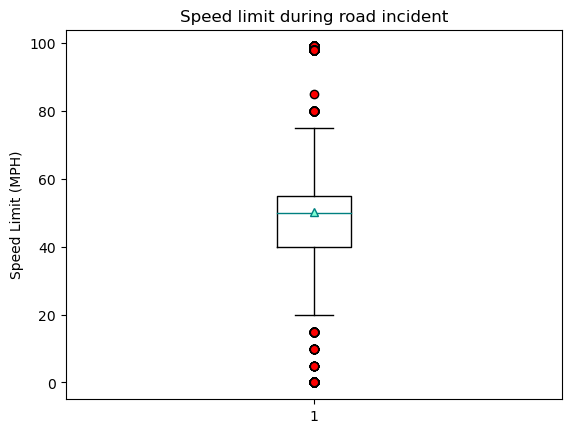

In [61]:
# Sets out box plot to view the distirbution of the speed limit mean/ median in relation to the speed limit data population. 
fig1, ax1 = plt.subplots()
ax1.set_title("Speed limit during road incident")
ax1.set_ylabel("Speed Limit (MPH)")

flierprops = dict(marker='o', markerfacecolor='r', markersize=6)
medianprops = dict(color = "teal")
meanprops = dict(markerfacecolor = "aquamarine", markeredgecolor="teal")


ax1.boxplot(speed_limit_df["Speed_Limit"],
                           showmeans=True,
                           flierprops = flierprops,
                           medianprops = medianprops, 
                           meanprops = meanprops)

plt.savefig("output_data/speed_limit_boxplot.png")
plt.show()

In [62]:
 # Quartile calculations
quartiles = speed_limit_df["Speed_Limit"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of speed limit is: {lowerq}")
print(f"The upper quartile of speed limit is: {upperq}")
print(f"The interquartile range of speed limit is: {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of speed limit is: 40.0
The upper quartile of speed limit is: 55.0
The interquartile range of speed limit is: 15.0
Values below 17.5 could be outliers.
Values above 77.5 could be outliers.


<b>Now that the speed limit data population has been thoughly observed, fatality will now also be introduced.<b> 

In [63]:
# Grouping the speed limit DataFrame. 
speed_limit_df = speed_limit_df.groupby(["Speed_Limit"]).sum()
speed_limit_df.reset_index(inplace=True)

speed_limit_df

Speed_Limit  Fatality_Count
0             0             361
1             5              11
2            10              26
3            15              76
4            20             124
5            25            1942
6            30            1974
7            35            4270
8            40            2912
9            45            5803
10           50            1662
11           55            9359
12           60            1289
13           65            3322
14           70            2326
15           75             784
16           80             110
17           85               1
18           98            1359
19           99             244

 The Pearson's correlation coefficient is: 0.10179
 The r-value is: 0.01036


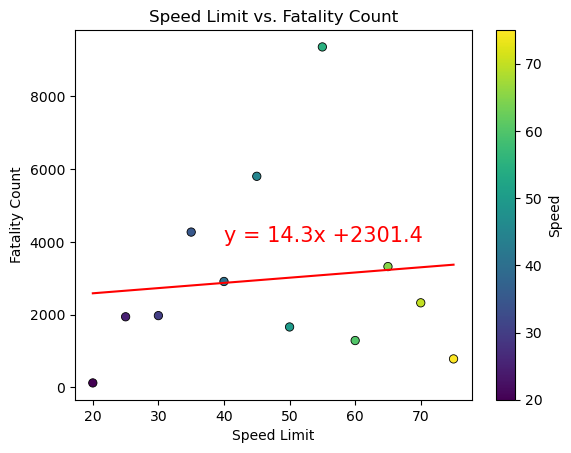

In [64]:
#Removing potential outliers. 
speed_limit_reduced = speed_limit_df.loc[(speed_limit_df["Speed_Limit"]>= 17.5) & 
                                  (speed_limit_df["Speed_Limit"]<= 77.5) , :]

# Scatter plot of Speed Limit Vs. Fatality Count.
x_values = speed_limit_reduced["Speed_Limit"]
y_values = speed_limit_reduced["Fatality_Count"]
plt.scatter(x_values ,y_values, marker="o", c=speed_limit_reduced["Speed_Limit"], edgecolor="black", linewidth=0.6)
clb = plt.colorbar()
clb.set_label("Speed")

# Headings. 
plt.title("Speed Limit vs. Fatality Count")
plt.xlabel("Speed Limit")
plt.ylabel("Fatality Count")

# Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (40,4000), fontsize=15, color="red")

correlation = st.pearsonr(x_values, y_values)
print(f" The Pearson's correlation coefficient is: {round(correlation[0],5)}")
print(f" The r-value is: {round(rvalue**2, 5)}")

plt.savefig("output_data/speed_limit_fatality_scatter.png")
plt.show()

<b> Speed Limit Vs. Fatality Analysis (Part 1): <b>
    
There is not a significant correlation between speed limit and fatality count, this is indicated by Pearson's correlation coefficient value of 0.10179 (5.d.p); any positive value below 0.3 is considered a very weak correlation. An increase of one MPH in the speed limit corresponds to a increase of 14 additional fatalities which is very insignificant when observing the scale of the fatality counts as this is nationwide. 

The equation of a line calculated is: y = 14.3x + 2301.4, this equation may help to regress the values of fatality counts at speed limits not included in the chart. For example, at a speed limit of 80 MPH, the equation suggests that there would be 3,445 fatalities acrosss the US for road incidents that occoured on a road with this speed limit. However, in this instance, as the correlation coefficient is so weak, a linear regression does not seem to be the best model. The reason why is because even if travelling at higher speeds is more dangerous; there are less people travelling at higher speed limits accross the nation which results in a lower likelyhood of a fatality. From our data set we can actually see that there were only 110 deaths at 80MPH.   
    
Finally, the r-squared value calculated: 0.01036 (5.d.p) is the coefficient of determination, this tells us that there the relationship between speed limit and the fatality count is explained by next to none of the variations in this dataset.

In [65]:
# As linear regression was found not to be the most suitable way to visualise our data, to help better visualise the data 
# the speed limits will be categorised into bins.
bins = [0, 25, 50, 75, 100]

group_names = ["0-25 MPH", "26-50 MPH", "51-75 MPH", "76-100 MPH"]

speed_limit_df["Speed_Limit_Group"] = pd.cut(speed_limit_df["Speed_Limit"], bins, labels=group_names)

speed_limit_df = speed_limit_df.groupby(["Speed_Limit_Group"]).sum()

speed_limit_df = speed_limit_df[["Fatality_Count"]]
speed_limit_df = pd.DataFrame(speed_limit_df)
speed_limit_df

Fatality_Count
Speed_Limit_Group                
0-25 MPH                     2179
26-50 MPH                   16621
51-75 MPH                   17080
76-100 MPH                   1714

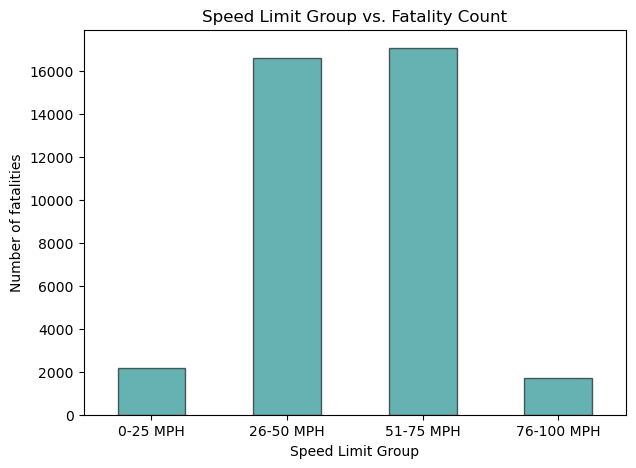

In [66]:
# Plotting bar graph. 
speed_limit_df.plot(kind="bar", rot = 0, figsize=(7,5), legend=False, 
                   title = "Speed Limit Group vs. Fatality Count",
                   xlabel = "Speed Limit Group", 
                   ylabel = "Number of fatalities", 
                   edgecolor ="black", 
                   color= "teal", 
                   alpha=0.6)

plt.savefig("output_data/speed_limit_binned_bar.png")
plt.show()

<b> Speed Limit Vs. Fatality Analysis (Part 2): <b>
    
As previously suggested, linear regression was not the best way to model speed limit vs fatality count. The above bar chart has grouped the speed limits into bins and suggests that most road fatalities occour in the range of 26-75 MPH. As an advisal Bragg's function regression (following a bell curve) shape would help with prediction rather than linear regression. However, in line with the summary statistics which were computed earlier in this study, a road fatality looks most likely to occour at 50MPH. 

<b> ANOVA test <b>

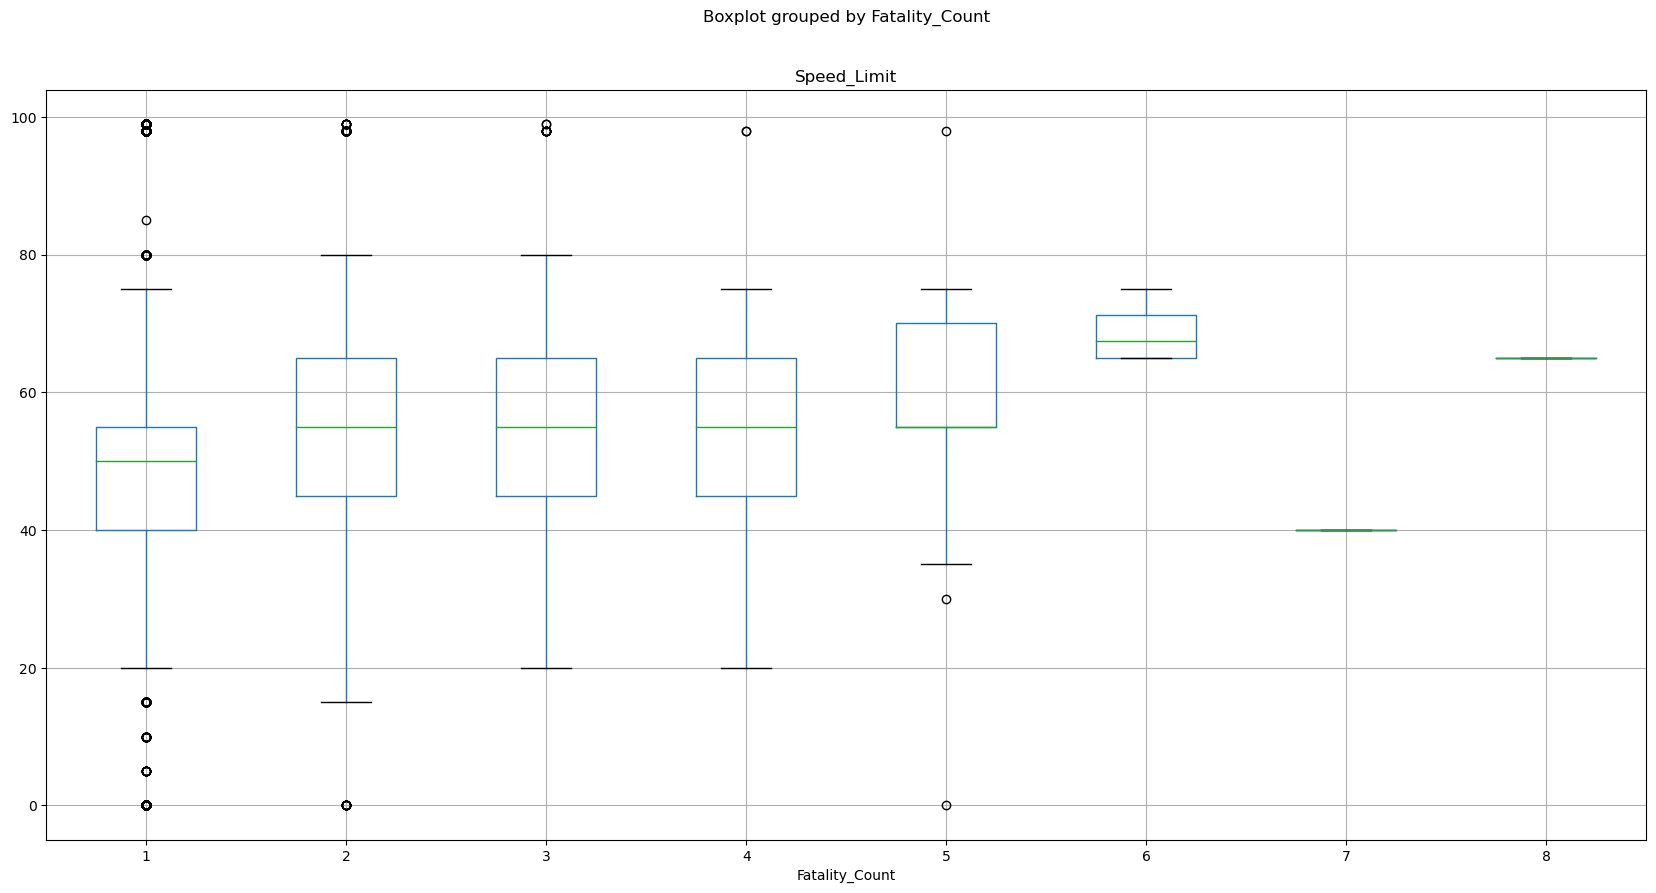

In [67]:
 # Create a boxplot to compare means 
speed_limit_df = Cleaned_df[["Speed_Limit", "Fatality_Count"]]
speed_limit_df.reset_index()
speed_limit_df.boxplot("Speed_Limit", by="Fatality_Count", figsize=(20, 10))

plt.savefig("output_data/fatality_grouped_boxplot.png")
plt.show()

The box plot distribution suggests that the mean fatality count may increase up until a certain point with a increase in speed limit until a fatality count of above or equal to 7.

In [68]:
 # Extract individual groups
group1 = speed_limit_df[speed_limit_df["Fatality_Count"] == 1]["Speed_Limit"]
group2 = speed_limit_df[speed_limit_df["Fatality_Count"] == 2]["Speed_Limit"]
group3 = speed_limit_df[speed_limit_df["Fatality_Count"] == 3]["Speed_Limit"]
group4 = speed_limit_df[speed_limit_df["Fatality_Count"] == 4]["Speed_Limit"]
group5 = speed_limit_df[speed_limit_df["Fatality_Count"] == 5]["Speed_Limit"]
group6 = speed_limit_df[speed_limit_df["Fatality_Count"] == 6]["Speed_Limit"]
group7 = speed_limit_df[speed_limit_df["Fatality_Count"] == 7]["Speed_Limit"]
group8 = speed_limit_df[speed_limit_df["Fatality_Count"] == 8]["Speed_Limit"]

In [69]:
 # Perform the ANOVA
st.f_oneway(group1, group2, group3, group4, group5, group6, group7, group8)

F_onewayResult(statistic=16.247319805638867, pvalue=1.6786914132905837e-21)

<b> Speed Limit Vs. Fatality Statistical Significance: <b>
    
From the performed Anova t-test, the pvalue is below the significance level of 0.05 and therefore, the null hypothesis could be rejected in line with the analysis outcomes which have been concluded.

# 9) Further Analysis

<b> Correlation heatmap.<b>

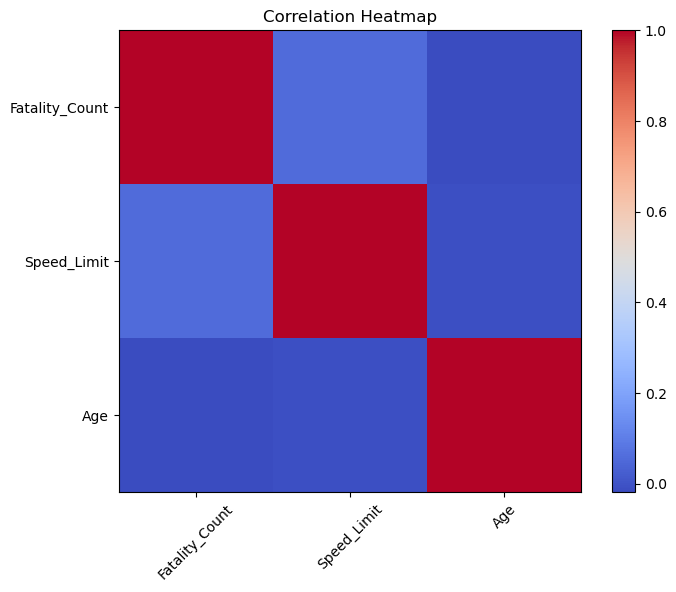

In [70]:
# Calculating the correlation matrix
correlation = Cleaned_df[['Weather_Condition', 'Fatality_Count', 'Speed_Limit', 'Age']].corr()

# Plotting a correlation heatmap 
plt.figure(figsize=(8, 6))
plt.imshow(correlation, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(correlation.shape[1]), correlation.columns, rotation=45)
plt.yticks(range(correlation.shape[1]), correlation.columns)
plt.title('Correlation Heatmap')
plt.show()

<b> Accidents per Vehicle Make.<b>

As part of our additional analysis we thought it may be interesting to see which vehicle makes are involved in the most car accidents.

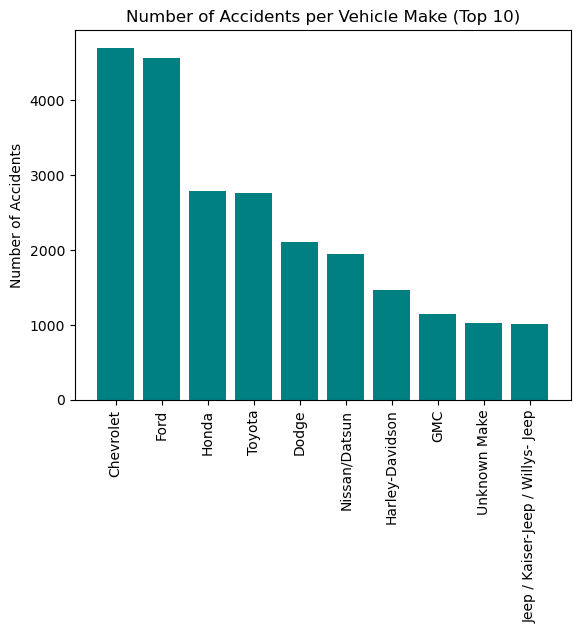

In [71]:
# retreiving accident numbers per vehicle make
vehicle_make_counts = Cleaned_df["Vehicle_Make"].value_counts()

# limiting to only vehicle makes with accident count over 1000
reduced_counts = vehicle_make_counts[vehicle_make_counts > 1000]

# creating bar chart
plt.bar(reduced_counts.index, reduced_counts, color="teal")
plt.ylabel("Number of Accidents")
plt.title("Number of Accidents per Vehicle Make (Top 10)")
plt.xticks(rotation=90)
plt.savefig("output_data/vehicle_makes.png")

plt.savefig("output_data/correlation_heatmap.png")
plt.show()

From this analysis we can see the top 10 vehicle makes by number of accidents. Chevrolet was the brand involved in the highest number of accidents, followed closely by Ford.

After further research we determined that these results overlap with the most common/popular car brands in the US which is to be expected.

One interesting thing to note was that though Toyota is the most common car brand in the US for 2020 (source: carlogos.org), the brand placed 4th in order of number of accidents. Further research would be necessary to determine whether this is due to higher reliability of Toyota cars or whether there are other factors at play.

<b> One Sample T-Test (Further Exploration of California? <b>

To be able to capture if using a sample of our data filtered to the state of California (the state with the most road accidents) would help gather reliable insights, a T-test is performed. 

In [72]:
# Creates a DataFrame to purely show the fatality counts for each road incident accross all US states. 
Fatality_df = Cleaned_df[["State", "Fatality_Count"]]
Fatality_df.head()

State  Fatality_Count
0  Alabama               3
1  Alabama               1
2  Alabama               1
3  Alabama               1
4  Alabama               1

In [73]:
# Population 1 will include all states.
population1 = Fatality_df
print(f" The mean fatality count accross all US states {round(population1.Fatality_Count.mean(),5)}")

# Population 2 will include just the state of California.
population2 = Fatality_df[Fatality_df["State"] == "California"]
print(f" The mean fatality count accross the US state of California {round(population2.Fatality_Count.mean(),5)}")

 The mean fatality count accross all US states 1.08573
 The mean fatality count accross the US state of California 1.08363


In [74]:
# T-test against Population1 and Population2.
st.ttest_1samp(population2.Fatality_Count, population1.Fatality_Count.mean())

TtestResult(statistic=-0.37577685258110727, pvalue=0.7071047313024144, df=3634)

The t-test result helps show the significance between the population of the road incidents fatalities data and the sample which narrows down the fatality data to focus soley on the state of Califonia. 

The significance level considered is 0.05, the p-value obtained was 0.71 (2.d.p). Therefore there was not a significant difference in the measured means occuring due to chance. Further exploring the state of California would not support  the rejection of the null hypotheses explored in this study. 

<b> Harm Event vs Fatality Count.<b>

Harm Event in the this study is defined as the first injury/ damage which has occoured as a result of the road incident being observed. 

The different types of harm events will be analysed against fatality count. 

In [75]:
# Creating a separate DataFrame to visualise the various harm events and the number of fatalities which occured in each case.
# Sex will also be included to help deduce additional insights during analysis. 
harm_event_df = Cleaned_df[["Harm_Event", "Sex", "Fatality_Count"]]
harm_event_df.reset_index()
harm_event_df.head()

Harm_Event     Sex  Fatality_Count
0        Tree (Standing Only)  Female               3
1  Motor Vehicle In-Transport  Female               1
2                       Ditch    Male               1
3        Tree (Standing Only)    Male               1
4        Tree (Standing Only)    Male               1

In [76]:
# There are many types of harm events, this study will focus on the four with the highest frequency.
harm_event_df["Harm_Event"].value_counts()

Motor Vehicle In-Transport                                                                                                               13332
Pedestrian                                                                                                                                5845
Rollover/Overturn                                                                                                                         2628
Tree (Standing Only)                                                                                                                      2471
Curb                                                                                                                                      1224
Ditch                                                                                                                                     1018
Pedalcyclist                                                                                                                               911

In [77]:
# Narrowing down the DataFrame to only include records relating to the four harm event types of focus. 

harm_event_df = harm_event_df.loc[(harm_event_df["Harm_Event"]=="Motor Vehicle In-Transport") | 
                                  (harm_event_df["Harm_Event"]=="Pedestrian") |
                                  (harm_event_df["Harm_Event"]=="Rollover/Overturn") |
                                  (harm_event_df["Harm_Event"]=="Tree (Standing Only)"), :]

# Replacing values names to be more comprehensible. 

harm_event_df = harm_event_df.replace({"Motor Vehicle In-Transport":"Moving Vehicle",
                                       "Rollover/Overturn":"Overturned Vechicle",
                                       "Tree (Standing Only)":"Standing Tree"
                                       })

harm_event_df["Harm_Event"].unique()

array(['Standing Tree', 'Moving Vehicle', 'Pedestrian',
       'Overturned Vechicle'], dtype=object)

In [78]:
# Narrowing down the DataFrame for the 'known' sex types (this dataset does not contain information about non-binary gender types). 

harm_event_df = harm_event_df.loc[(harm_event_df["Sex"]=="Male") | 
                                  (harm_event_df["Sex"]=="Female"), :]

harm_event_df["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [79]:
# Groups the harm_event_df by the harm event and then by sex. 
harm_event_df = harm_event_df.groupby(["Harm_Event", "Sex"]).sum()
harm_event_df = harm_event_df.reset_index()
harm_event_df

Harm_Event     Sex  Fatality_Count
0       Moving Vehicle  Female            3648
1       Moving Vehicle    Male           11478
2  Overturned Vechicle  Female             647
3  Overturned Vechicle    Male            2104
4           Pedestrian  Female            1370
5           Pedestrian    Male            4482
6        Standing Tree  Female             638
7        Standing Tree    Male            2038

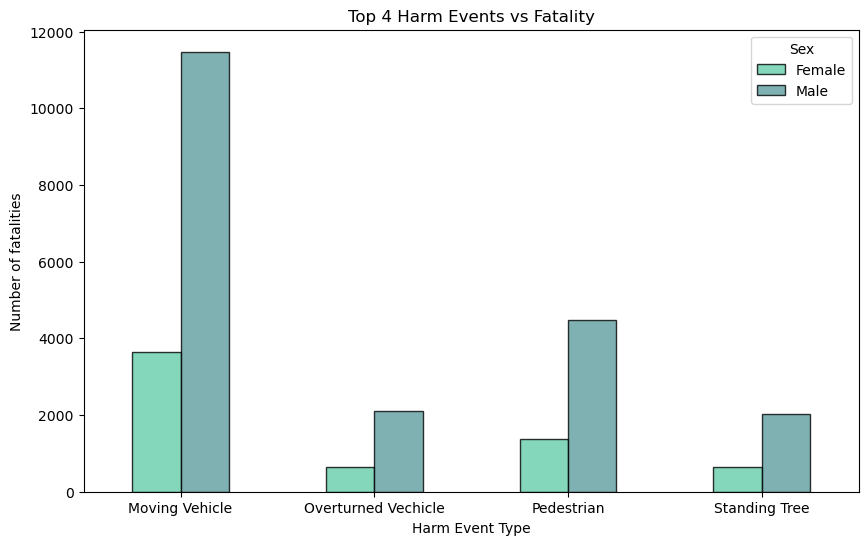

In [80]:
# Bar plot showing the top 4 harm_events identified vs fatality count. 
harm_event_df.pivot(index="Harm_Event", columns="Sex", values="Fatality_Count").plot(kind = "bar", 
                                                                                     rot = 0, figsize=(10,6), 
                                                                                     color =('mediumaquamarine', 'cadetblue'), 
                                                                                     title = "Top 4 Harm Events vs Fatality",
                                                                                     xlabel = "Harm Event Type", 
                                                                                     ylabel = "Number of fatalities", 
                                                                                     edgecolor="black",
                                                                                     alpha=0.8
                                                                                    )

plt.savefig("output_data/harm_event_bar.png")
plt.show()

<b> Harm Event Vs. Fatality Analysis: <b>
    
The event which caused harm to the individuals involved in fatal road incident was a moving vehicle, from this it may inferred that most fatal road incidents were involving two or more vehicles rather than a driver colliding with a non motor object such as a standing tree or even (unfortunateley) a pedestrian.
    
When observing the genders who were involved in a fatal road accidents of each harm type, it is apparently clear that more males had died during these road accidents across all the observed harm types, however, although males appear to be more likely to get into a road accident, the reasoning would need to be explored further as this could be related to the ratio of male: female drivers in the US rather than actual behavioral traits.  